In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)

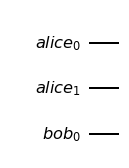

In [2]:
from qiskit import QuantumRegister
alice_reg = QuantumRegister(2, name="alice")
bob_reg = QuantumRegister(1, name="bob")
qc = QuantumCircuit(alice_reg, bob_reg)
qc.draw(output='mpl')

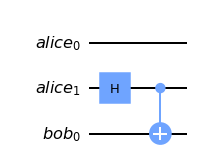

In [3]:
qc.h(alice_reg[1]) 
qc.cx(alice_reg[1], bob_reg[0])
qc.draw(output='mpl')

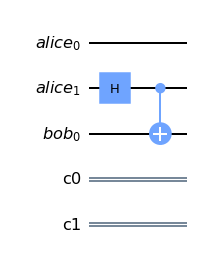

In [4]:
from qiskit import ClassicalRegister
alice_bell_class_reg = ClassicalRegister(1)
qc.add_register(alice_bell_class_reg)
bob_class_reg = ClassicalRegister(1)
qc.add_register(bob_class_reg)
qc.draw(output='mpl')

In [5]:
qc.measure(alice_reg[1], alice_bell_class_reg) #measures Alice's second qubit into the first classical bit
qc.measure(bob_reg[0], bob_class_reg) #measures Bob's first qubit in the second classical bit

In [6]:
from qiskit import BasicAer, execute
backend = BasicAer.get_backend('qasm_simulator')
results = execute(qc, backend=backend).result()
results.get_counts()

{'0 0': 486, '1 1': 538}

In [10]:
from qiskit import IBMQ
IBMQ.save_account('c4ba8386843396f75f0e3cfdd7b9687de85490565d3138d39d15dcb1f872d8bcf2a5bef50a0f515462e25e891a269135e145802f47e6c3a2ac2b66b3e4beab0b')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

configrc.store_credentials:WARNING:2021-12-09 16:19:48,981: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-12-09 16:19:49,342: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [11]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(simulator=False))
print(backend)
job_exp = execute(qc, backend=backend, shots=1024)
exp_result = job_exp.result()
exp_measurement_result = exp_result.get_counts(qc)
print(exp_measurement_result)

ibmq_belem
{'0 0': 514, '0 1': 29, '1 0': 27, '1 1': 454}
